GEREKLİ KÜTÜPHANELERİN İMPORTU

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

from sklearn.linear_model import LinearRegression

DATA SETİNİN İMPORTU VE GEREKSİZ SÜTUNLARIN ATILMASI

In [2]:
data=pd.read_csv("oasis_longitudinal.csv")
data=data.drop(columns=['Subject ID','MRI ID'],axis=1)



DATA SETİMİZE GENEL BAKIŞ


.Group

.Ziyaret Sayısı (Visit)

.MR 'daki Gecikme (MR Delay)

.Cinsiyet (M/F)

.Dominant El (Hand)

.Yaş (Age)

.Eğitim Gördüğü Yıl (EDUC)

.Sosyo-Ekonomik Durum (SES)

.Mini Mental Durum Muayenesi (MMSE)

.Klinik Demans Derecelendirmesi (CDR)

.Tahmini Toplam İntrakniyal Hacim (eTIV)

.Normalize Edilmiş Beyin Hücreleri (nWBV)

.Atlas Ölçeklendirme Faktörü (ASF)

In [3]:
data.shape

(373, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Group     373 non-null    object 
 1   Visit     373 non-null    int64  
 2   MR Delay  373 non-null    int64  
 3   M/F       373 non-null    object 
 4   Hand      373 non-null    object 
 5   Age       373 non-null    int64  
 6   EDUC      373 non-null    int64  
 7   SES       354 non-null    float64
 8   MMSE      371 non-null    float64
 9   CDR       373 non-null    float64
 10  eTIV      373 non-null    int64  
 11  nWBV      373 non-null    float64
 12  ASF       373 non-null    float64
dtypes: float64(5), int64(5), object(3)
memory usage: 38.0+ KB


In [5]:
data.head()

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


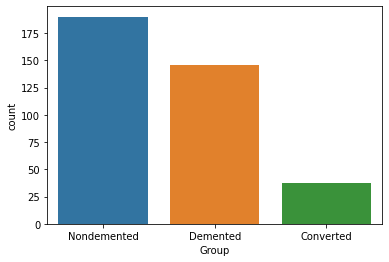

In [6]:
sns.countplot(x="Group",data=data)
plt.show()

In [7]:
data.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


VERİ SETİMİZİN İSTATİKSEL BOX GÖSTERİMİ

In [8]:
graph =data[['Age','EDUC','SES','Visit','MR Delay','MMSE','CDR','eTIV','nWBV','ASF']]

graph.iplot(kind='box',size=4)

ÇIKARIMLAR

. Eğitim yılları en yüksek bireylerde Alzhimer görülmememekte.Aynı şekilde eğitim yılı düşük olan bireylerde Alzheimer görülmektedir.Ayrıca mini mental durum puanıda (MMSE) o derecede yüksek olmaktadır. Bağımsız olarak Kadın bireylerin eğitim düzeyleri daha yüksek.

In [9]:
data[data['EDUC'].max()==data['EDUC']]

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
107,Nondemented,1,0,F,R,92,23,1.0,29.0,0.0,1454,0.701,1.207
108,Nondemented,2,457,F,R,94,23,1.0,29.0,0.0,1474,0.696,1.190
109,Nondemented,3,1526,F,R,97,23,1.0,30.0,0.0,1483,0.689,1.184


In [10]:
data[data['EDUC'].min()==data['EDUC']]

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
78,Demented,1,0,M,R,84,6,4.0,25.0,0.5,1310,0.727,1.339
79,Demented,2,567,M,R,86,6,4.0,27.0,0.5,1320,0.724,1.329
80,Demented,3,1204,M,R,88,6,4.0,23.0,0.5,1348,0.713,1.302


In [10]:
data[data['CDR'].max()==data['CDR']]

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
184,Demented,2,754,F,R,98,17,1.0,21.0,2.0,1503,0.66,1.168
251,Demented,2,595,F,R,78,14,3.0,15.0,2.0,1401,0.70,1.253
330,Demented,2,580,M,R,79,20,1.0,25.0,2.0,1710,0.76,1.026


SICAKLIK HARİTASI VE KORELASYON İLİŞKİSİ İNCELEMESİ

. MR Delay ve Visit arasındakii korelasyon 0.92 yani doğrusal korelasyon var.O zaman Alzheimer hastalığı için tedavide erken teşhiste ilk ziyaretten sonra gecikme yapılmamalı ve düzenli MR takibi yapılmalıdır.Gecikme oldukça ,hastalık ilerleme kaydedip hastane ziyaretleride artışa geçmektedir.

.Mini Mental Durum muayenisi (MMSE) ile Klinik Demans Derecelendirmesi (CDR) arasında ters korelasyon var.Hastaların MMSE puanı ne kadar iyiyse Demans dereceside o kadar azlık göstermektedir.

.Tahmini Toplam İntrakniyal Hacim (eTIV) ile Alçak Ölçeklendirme Faktörü (ASF) arasında ters korelasyon var.Kafa hacmi ne kadar büyükse (ASF),Beyin Boşluğu (eTIV) o kadar azlık göstermektedir.

.Bağımsız bir korelasyon olan eğitim (EDUC) ile Sosyo-ekonomik durum arasında doğrusal korelasyon var.Eğitim düzeyi ne kadar yüksekse sosyoekonomik durum okadar iyidir.Burdaki veri setinde kötü duruma yüksek verdiği için ters korelasyon gözüküyor.Normalde doğrusal korelasyon var.

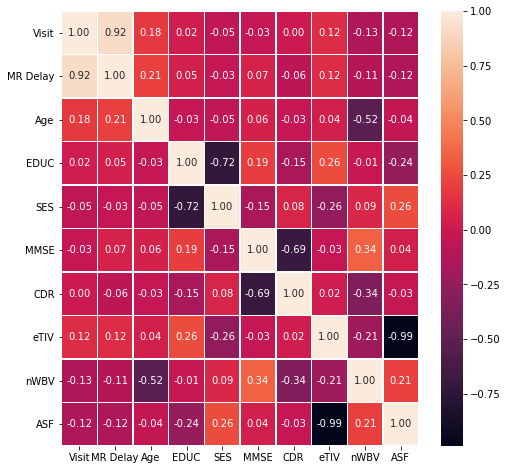

In [11]:
fig,ax=plt.subplots(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,linewidths=.5,fmt='.2f',ax=ax)
plt.show()

REGRESYON İLİŞKİSİ

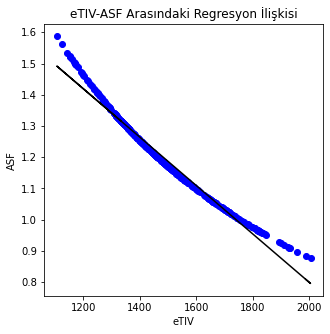

In [12]:
fig,ax=plt.subplots(figsize=(5,5))
x=data["eTIV"]
y=(data["ASF"])
l=LinearRegression()
x_r=x.values.reshape(-1,1)
y_r=y.values.reshape(-1,1)

plt.scatter(x,y,color="blue")
l.fit(x_r,y_r)
y_pred=l.predict(x_r)
plt.plot(x,y_pred,color="black")
plt.title("eTIV-ASF Arasındaki Regresyon İlişkisi")
plt.xlabel("eTIV")
plt.ylabel("ASF")

plt.show()

. Kadın bireylerin Erkeklere göre MMSE Puanı daha yüksek.

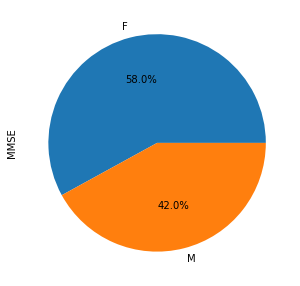

In [12]:
a=data.groupby('M/F')['MMSE'].sum()
plt.figure(figsize=(5,5))

a.plot.pie(autopct="%.1f%%")


plt.show()


. Erkek bireylerin CDR derecesi Kadın bireylerden daha fazla.

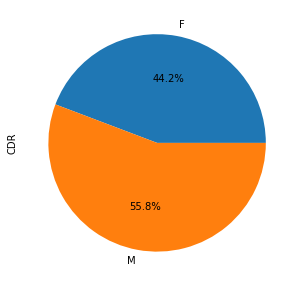

In [13]:
a=data.groupby('M/F')['CDR'].sum()
plt.figure(figsize=(5,5))

a.plot.pie(autopct="%.1f%%")


plt.show()

Gruba göre CDR Toplamları

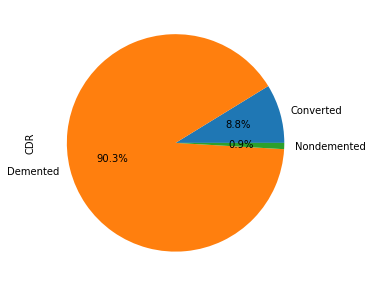

In [14]:
a=data.groupby('Group')['CDR'].sum()
plt.figure(figsize=(5,5))

a.plot.pie(autopct="%.1f%%")


plt.show()

Gruba Göre MMSE Puanları

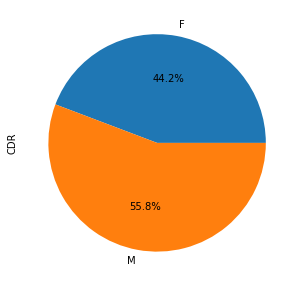

In [15]:
a=data.groupby('M/F')['CDR'].sum()
plt.figure(figsize=(5,5))

a.plot.pie(autopct="%.1f%%")


plt.show()